In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [7]:
# reading the data
print(os.getcwd())
bikes_hour_df_raws = pd.read_csv('/home/chandan/Bike-Sharing-Dataset/hour.csv')
bike_day_df_raws = pd.read_csv('/home/chandan/Bike-Sharing-Dataset/day.csv')

/home/chandan


In [8]:
# First Rows of bike rental hour dataset
bikes_hour_df_raws.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# First Rows of bike rental day dataset
bike_day_df_raws.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Analysing and cleaning of unused features

In [10]:
# removing useless feature
bikes_hour_df = bikes_hour_df_raws.drop(['casual' , 'registered'], axis=1)

In [11]:
#lets get information about features
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


In [12]:
bikes_hour_df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

Text(0.5,0.98,'Recorded Bike Rental Counts')

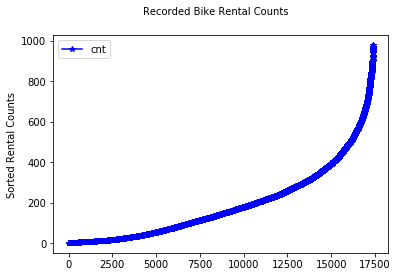

In [13]:
fig, ax = plt.subplots(1)
ax.plot(sorted(bikes_hour_df['cnt']), color = 'blue', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)

Quantitative Features vs. Rental Counts¶

Text(0,0.5,'Count of all Biks Rented')

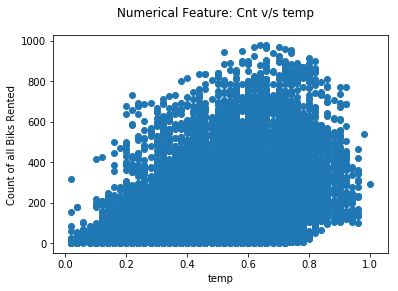

In [14]:
plt.scatter(bikes_hour_df['temp'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0,0.5,'Count of all Biks Rented')

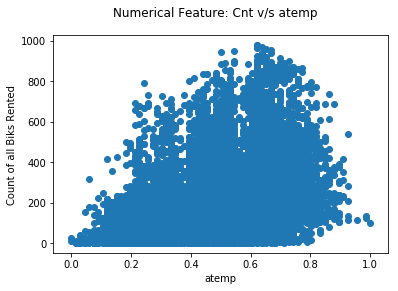

In [15]:
plt.scatter(bikes_hour_df['atemp'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

Text(0,0.5,'Count of all Biks Rented')

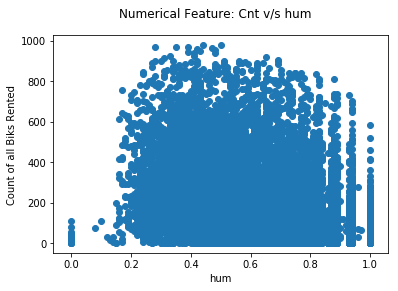

In [16]:
plt.scatter(bikes_hour_df['hum'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

Text(0,0.5,'Count of all Biks Rented')

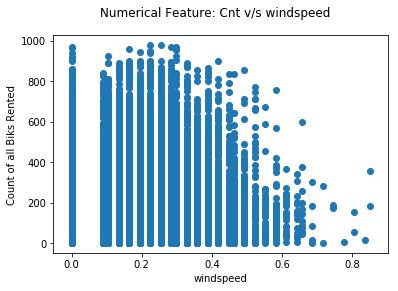

In [17]:
plt.scatter(bikes_hour_df['windspeed'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

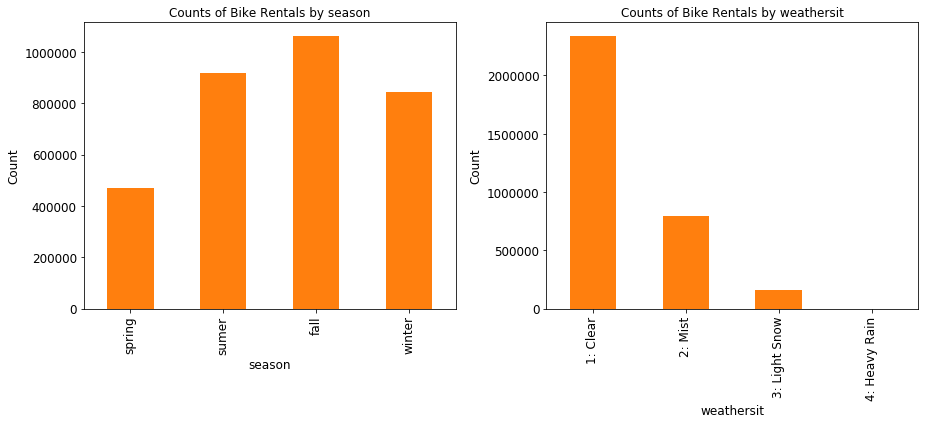

In [18]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = bikes_hour_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = bikes_hour_df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

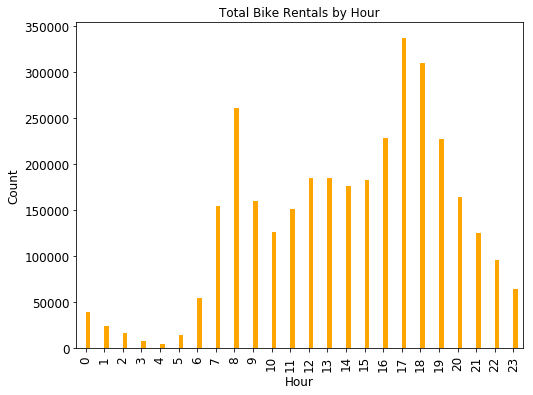

In [19]:
# alternative way of plotting using groupby
ax = bikes_hour_df[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [26]:
# lets copy for editing without effecting original
bikes_df_model_data = bikes_hour_df.copy()

outcome = 'cnt'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

#spliting data into train and test portion
X_trian, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=42)



from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_trian,y_train)

print ("Train score",logmodel.score(X_trian,y_train))
print ("Test score",logmodel.score(X_test,y_test))
    
 

# making predection using the test set
y_pred = logmodel.predict(X_test)

#root mean squared error
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))

Train score 0.031237155774763666
Test score 0.018603759110088224
RMSE: 178.25


In [31]:
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
logmodel = LogisticRegression()
# fpr, tpr,_=roc_curve(logmodel.predict(X_test),y_test,drop_intermediate=False)